# Visualization and cleaning data with TITANIC DATASET

## Introduction
Congratulations! So far you have learned the basics of Python, Pandas and visualization techniques to analyse and to clean data. These are valuable skills because 80% of a data scientist's job is cleaning data and getting insights through visualizations. Only 20% are building and tuning machine learning models (which you will learn more about at the end of your curriculum). 

To see how powerful visualizations can be and how enthusiastic one can become about plots, check out the Ted talk "The best stats you've ever seen" by Hans Rosling:

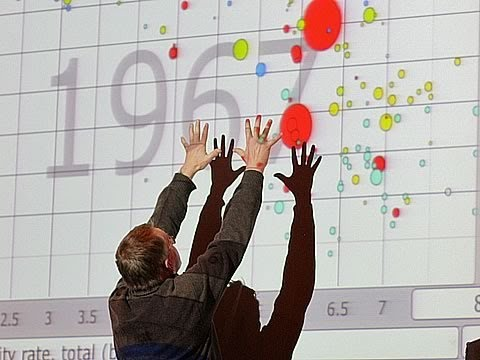

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('usdJgEwMinM', width=600, height=400)

## Learning Goals

- Learn how to clean data
- Learn how to investigate your data through visualizations
- Explore what representations exist in your dataset
- Create new data/features using the data at hand

Everything you will need to do will be inside of this notebook, and I've marked which cells you will need to edit by saying <b><font color='red'>"TODO! COMPLETE THIS SECTION!"</font></b>.

## Personal experience
One interesting plot I saw recently is the one below. The graph shows the babies per woman and child survival rates for all contries. Each bubble on the graph represents a country, with the size of the bubble showing the size of the country's population.
![](https://drive.google.com/uc?export=view&id=1mK4x7eJEP_PbtbNyu0lUoMO0f6JhzvPh)
The picture is from gapminder.org and shows that our assumption about the world being divided into developing and developed contries is overdue. Contries could be divided into the two categories in the past (1965) but the world has changed completely. The developing box is nearly empty and 85% of all countries are inside the box that used to be named developed.  

What interesting plot did you come across lately? Feel free to copy-paste it in our data science channel on Slack. I would love to hear from you.

Now let's come back to the notebook and the excersices. In this notebook we will explore the Titanic dataset to practice your visualization and pandas/cleaning skills more so that you also can create interesting visualizations.

## Practice with TITANIC dataset

Before you start make sure you read the README pdf file inside the unzipped folder.

### import libraries
We will use these packages to help us manipulate the data and visualize the features/labels/columns. Numpy and Pandas are helpful for manipulating the dataframe and its columns and cells. Up until now you have only worked with matplotlib in your curriculum. Here we will use matplotlib along with Seaborn to visualize our data. 

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. And it generates prettier plots than matplotlib.

It is ok if you don't know how to plot data with Seaborn. That's what google is for. It is standard procedure to google while coding. I also often forget how to use certain functions and just google them.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### first impression and informations to the dataset

With Pandas, we can load the training data. You should always take a look at our data table to see the values that you'll be working with. You can use the shape and head function to look at some sample data. We can also look at its keys and column names.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [59]:
# Import the csv file using pandas
train = pd.read_csv('/train.csv')

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [7]:
# display the shape of the dataframe
np.shape(train)

(891, 12)

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [8]:
# use head and display the first 5 rows of your dataframe
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Short description of the data
1. The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictors or independent variables. What's important to note, more predictor variables do not make a better model, but the right variables.
2. The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The Pclass variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. The Name variable is a nominal datatype. Besides the name of the passenger it also holds the information about the title, like master and so on.
5. The Sex stores the information about the passengers sex as string (female or male)
6. Embarked variables are a nominal datatype and hold the information about the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
6. The Age and Fare variable are continuous quantitative datatypes.
7. The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. 
8. The Cabin represents the cabin number.

Let's check how many entries are nan  

In [9]:
# use the isnull method to find out which columns contain null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are NaN values in our data set in the age column. Furthermore, the Cabin column has a lot of missing values as well. These NaN values will get in the way of training a machine learning model. You need to fill in the NaN values with replacement values in order for the model to have a complete prediction for every row in the data set. This process is known as imputation and you will practice how to replace the missing data as well as get a feeling what story the data is telling you by using visualizations.

Let's start with the age columns.

### visualize and clean data: Age

Let's look how the age is dristributed. First create a copy of the dataframe to avoid maniplulating the main dataframe while doing first investigations.

Then plot the distribution of the age column by using seaborns displot function (you can google "seaborn distribution" to see how the function is used).

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

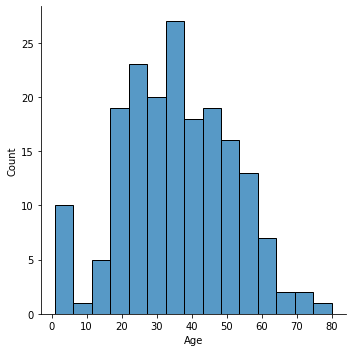

In [14]:
# make a copy of the dataframe
copy = train.copy()
# drop all nan values of the age column using dropna.
# don't forget to set the inplace parameter to True
copy.dropna(inplace=True)
# plot the distribution of the age by using seaborns displot function
# input the Age column of your copy dataframe.
# And set the bins parameter to 15
sns.displot(data=copy['Age'], bins=15)

The distribution does not look crazy skewed. thus let's try using the mean value of the age to fill all nan values (if you want to use median instead feel free to try it) and display again the distribution: 

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

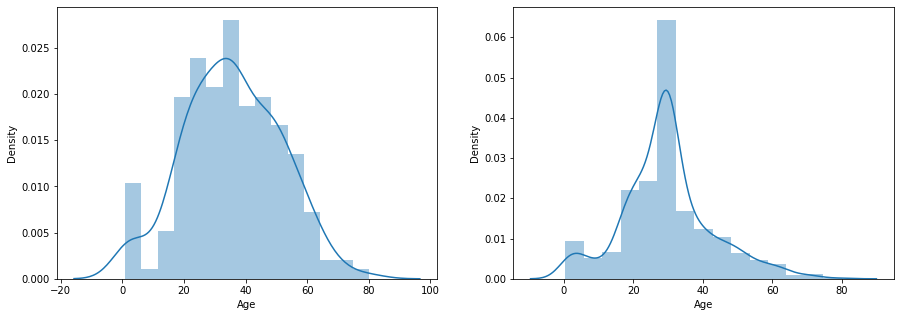

In [15]:
# make a copy of the dataframe
copy = train.copy()
# fill NaN values in age column with mean value. use the .fillna method. 
# Don't forget to set the inplace parameter to True
copy.Age.fillna(value=np.mean(copy.Age), inplace=True)

# we will create a subplot with 2 figures to look how the age distribution changed
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# this will plot the age distribution without nan values.
# the ax parameter is set to ax[0] so that the subplot knows where to place the plot
sns.distplot(train.dropna().Age, bins=15, ax=ax[0])
# plot here the age distribution in the copy dataframe where you
# replaced all nan values with the mean age value. 
# don't forget to set the ax parameter to ax[1]
sns.distplot(copy.Age, bins=15, ax=ax[1])

now there is a very large peak. maybe just the mean value is not a very good idea. another idea is to generate random numbers between (mean - std) and (mean + std). For this you will generate an age_generator function below.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [19]:
def age_generator(df):
    # save the mean value of the age column here
    age_avg = df['Age'].mean()
    # save the standard deviation of the age column here
    age_std = df['Age'].std()
    # we need the number of null values to know how much random ages to generate
    # use the isnull and sum functions
    age_null_count = df['Age'].isnull().sum()

    # this will generate a list of random numbers between (mean - std) and (mean + std)
    age_null_random_list = np.random.randint(
        age_avg - age_std, age_avg + age_std, size=age_null_count)
    # select all nan ages and set it equal to the list of random ages
    df['Age'][np.isnan(df['Age'])] = age_null_random_list
    return df

After successfully implementig the age_generator you can now use it.

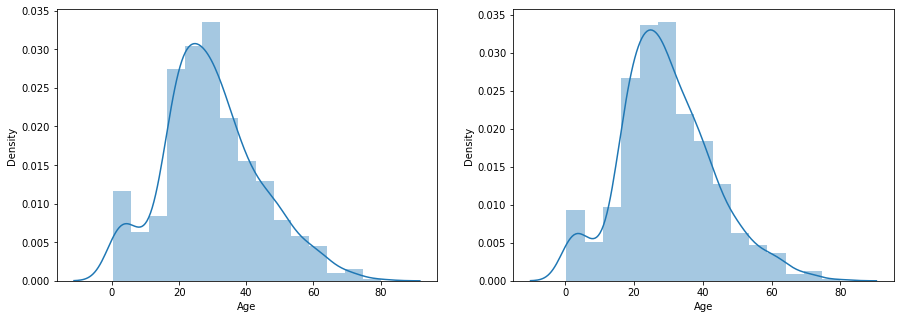

In [20]:
# again let's first create a copy of our dataframe
copy = train.copy()
# apply the age_generator function to the copied dataframe
copy = age_generator(copy)

# and here we will plot again the distribution of the age from the raw dataframe
# and the dataframe where you replaced all nan values
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# plot the age column of the train data. 
# don't forget to drop the nan values otherwise an error will occure.
# set the bins and ax like in the plot above
sns.distplot(train.Age.dropna(), bins=15, ax=ax[0])
# plot the age column of the copy data.
# you don't have to drop the nan values since to replaced them
# with the age_generator.
# set the bins and ax like in the plot above
sns.distplot(copy.Age, bins=15, ax=ax[1])

now the distribution is slightly skewed right, but this seems better than just using the mean value. So let's use the random age distribtion as cleaning method

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [60]:
# generate random age between (mean - std) and (mean + std)
# this time we will apply it onto our raw dataframe since 
# we want to keep this change
train = age_generator(train)

# the age column should be clean now
# display the sum of nan values for each column
# use the isnull and sum functions
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

All NaN values should be removed from the age column. Great work. The only nan values left are in the Cabin column. But we will focus on the Cabin column later.

Now let's get a feeling if the age column alone is a good feature to predict who survived. What do you think? Will it be a good predictor? 

We can analyze this for example with two different plots: a boxplot or as before by using a distribution plot. Let's start with a box plot

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

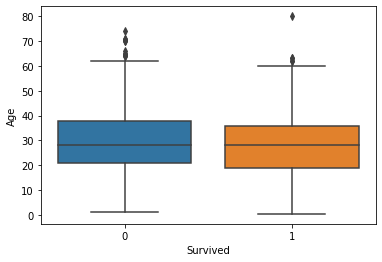

In [23]:
# call the boxplot function from seaborn and set the x parameter 
# to the "Survived" column and the y parameter to the "Age" column.
# also set the data parameter to the train dataset.
# feel free to google seaborn boxplot if you are not sure 
# how to use it
sns.boxplot(x='Survived',y='Age', data=train)

We see that the age for both survived and not survived has nearly the same range. Thus the age alone won't be a good predictor if we want to know who survived and who didn't.

As promised we can also use the distribution plot to visualize that the age of survived passengers and not survived passengers have a significant overlap.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

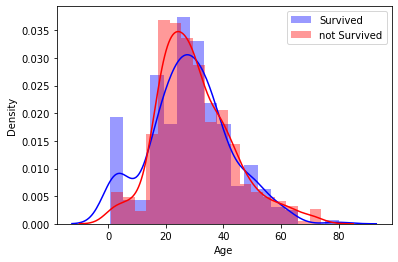

In [26]:
# slice/filter the train dataframe to plot first only the survived passengers
# and second only the not survived passengers
sns.distplot(train.loc[train['Survived'] == 1, 'Age'], color='blue', label='Survived')
sns.distplot(train.loc[train['Survived'] == 0, 'Age'], color='red', label='not Survived')
plt.legend()

Here you should see that the distribution of survived passengers has two peaks. The big one is very close to the peak of not survived passengers, but the second smaller peak is in the range of small children. This means a lot more small children survived the tragic accident.

### visualize and clean data: Sex

Let's now anaylse the sex of the passengers. What do you think? Did more women or men survive the tragic titanc accident?

Let's find out by plotting a barplot of the Sex column.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

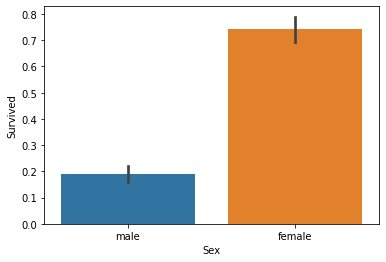

In [29]:
# use the barplot function of seaborn. 
# enter the train dataset as data and plot Sex (x)
# against Survived (y)
sns.barplot(x='Sex',y='Survived',data=train)

The plot shows us that more female passengers survived than male passengers. 

Until now we have analysed the age and sex information. We saw that the age alone was not an important feature to predict who survived and who didn't, but the sex is. Do you think there is an age difference between survived and not survived inside each sex?

Use boxplots to find out:

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

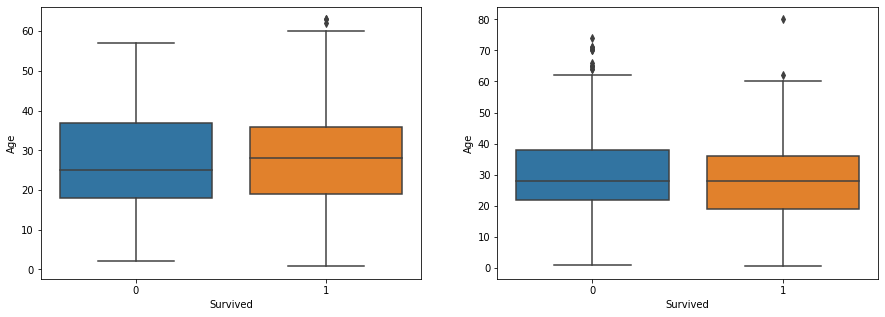

In [31]:
# this will create a subplot figure with two plot side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# first plot the data for females by 
# slicing/filtering the train data with 'female'
sns.boxplot(x="Survived", y="Age", data=train[train.Sex == 'female'], ax=ax[0])
# second plot the data for males by slicing the train data with 'male'
# don't forget to set the ax to ax[1]
sns.boxplot(x='Survived',y='Age',data=train[train['Sex'] == 'male'], ax=ax[1])

You should now see that both gender groups have an overlapping age range regarding survived and not survived passengers.

### visualize and clean data: Pclass

Recall that Pclass holds the information about the class each passenger had with 1 = first class, 2 = middle class and 3 = low class. Let's find out how the survival rate is distributed over the different classes.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

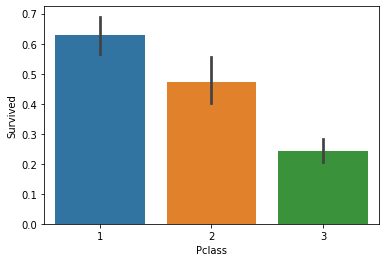

In [34]:
# use seaborns barplot function to plot the information of Pclass against Survived
sns.barplot(x='Pclass',y='Survived', data=train)

Did you anticipate the result? More people from the first class survived than from the second class and from the second class more people survived than from the thrid class.

What does this distribution look like if we make the same analysis but differentiate between the two genders. You can do this by using the "hue" parameter of the barplot function in seaborn:

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

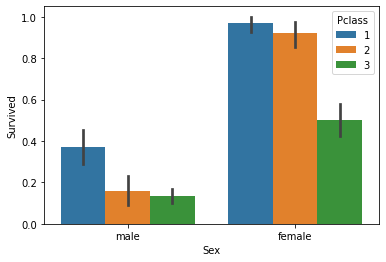

In [37]:
# create a barplot with sex plotted against survived and set hue to 'Pclass'
sns.barplot(x='Sex',y='Survived',data=train, hue='Pclass')

You should see a plot where each, male and female, have three bars representing the three different classes. 

Now we don't see a linear decline in survived passengers acrose the different classes. What you can see instead is that much more men from the first class survived. In contrast the percentage of survived women in the first and second class is nearly the same and much higher than the survival rate of the third class.

### clean data: Embarked and Cabin
Let's also clean the embarked and cabin column since it also has nan values:

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

the embarked column has some missing value. Fill those with the most occurred value ('S').

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [61]:
# use the fillna method to replace the nan's with 'S'
train['Embarked'] = train['Embarked'].fillna('S')

The cabin column has too many missing values (687 out of 891). Thus it is hard to replace the nan values with something meaningful. That's why we can just drop the column

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [62]:
# drop the cabin column
train = train.drop('Cabin',1)

Let's check once more if everything is clean

In [63]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

YAHOO!!! You successfully managed to clean the dataframe.

### create new feature
Besides analysing features in a dataset the task of a good data scientist is also to use the existing dataset to come up with new features. This it not an easy task but it is a task where you can be very creative. What do yo think could be another interesing feature? You can scroll to the describtion of the dataset if you want to remind yourself what other information is stored in the dataframe and what you could use to create new features. 

If you don't want to because you are busy and need to finish this notebook fast, here are some suggestens we are going to look at :) 

1. family size 
2. alone

but feel free to also try out your own ideas.

In [50]:
train.head(5)
# ticket price (but already related to class)
# if with parents or children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Ellipsis
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Ellipsis
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Ellipsis
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Ellipsis
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Ellipsis


### new feature: family size
With the number of siblings/spouses from the column SibSp and the number of children/parents from the Parch column we can create a new feature called family size. 

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [64]:
# create the family size feature by adding the SibSp and Parch columns
# (don't forget to add 1 because the person with the family is also a member of the family)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

Great! You now created the FamilySize feature. Let's have a look at the question if bigger or smaller families survived.

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

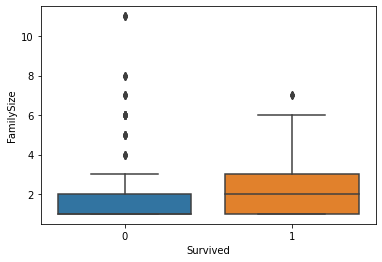

In [65]:
# use a boxplot and plot Survived against FamilySize 
# use the train dataframe as data input into the boxplot method
sns.boxplot(x='Survived',y='FamilySize',data=train)

you should see that both boxplots have an overlap but the the family sizes of survived passengers are distributed over a larger range. Does this mean that bigger families had a bigger chance to survive?

### new feature: is alone

In the last section you successfully created a new feature called FamilySize. Now you can leverage that feature to create another one. This time you will create the "is alone" feature. This will denote if a passenger was alone on the ship (= 1) or if he was there with his family (= 0).

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

In [66]:
# create a IsAlone column (1 = is alone, 0 = is not alone).
# first create the column and set it so 0
train['IsAlone'] = 0
# now filter the dataframe and set IsAlone to 1 where FamilySize is equal to 1
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

Now check how many passengers survived who were alone and how many survived who were not alone

<h4><font color='red'>TODO! COMPLETE THIS SECTION!</font></h4>

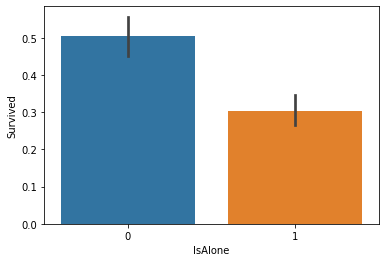

In [67]:
# use a barplot again and plot the IsAlone column against the Survived column
sns.barplot(x='IsAlone',y='Survived',data=train)

You should see that approximately 50% of passengers survived who were not alone and that sadly only 30 of lone passengers survived.

Since we now have a lot of interesting features, we can also ask and analyse interesting questions. For example we saw that more women than men survived and that inside both groups the age wasn't a big differentiator. But what do you think? Did more lone women than not lone women survive? And how did being alone affect the men?

To answer this you can again use a barplot.

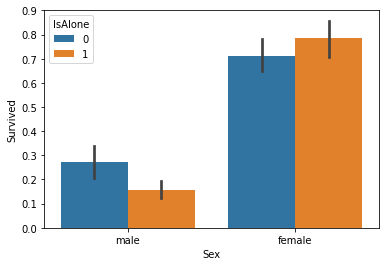

In [68]:
# use seaborns barplot function and plot Sex against Survived
# and set the hue to IsAlone
sns.barplot(x='Sex',y='Survived',data=train, hue='IsAlone')

You should now see that being alone affected the genders and their change of survival differently. More lone females survived the titanic accident but in contast more lone males died in the titanic accident.

## machine learning model
If you reached this part - well done :) you should now be very good at cleaning, investigating and visualizing data. This part is an outlook for you. Cleaning data is a very important if not the most important part of every data sience project.

Here you will see a model trained on your cleaned data. Don't be confused or anything if you don't understand what is happening below. Again, this is just an outlook for what you will learn during your TechLabs Track. At the end of the semester you will be able to wirte the same machine learning model and even more complex ones. Thus this part is here to motivate you and to show you that your data science journey has just started :)

In [71]:
# Helper.py

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


class dataset:

    def __init__(self, data):
        data.reset_index(drop=True, inplace=True)
        self.data = {'train': data}
        self.age_avg = data['Age'].mean()
        self.age_std = data['Age'].std()
        self.fare_avg = data['Fare'].median()

    def add_dataset(self, name, data):
        data.reset_index(drop=True, inplace=True)
        self.data[name] = data

    def clean(self, name='train'):
        df = self.data[name].copy()
        df = self.age_generator(df)
        # embarked
        df['Embarked'] = df['Embarked'].fillna('S')
        # fare
        df['Fare'] = df['Fare'].fillna(self.fare_avg)
        # drop uninteresting columns
        cols = ['Cabin', 'Name', 'PassengerId', 'Ticket']
        drop_cols = [x for x in df.columns if x in cols]
        df.drop(columns=drop_cols, inplace=True)
        self.data[name] = df

    def create_new_feature(self, name='train'):
        df = self.data[name].copy()
        # create family size
        df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
        # create is alone
        df['IsAlone'] = 0
        df.loc[df.FamilySize == 1, 'IsAlone'] = 1
        cols = ['Parch', 'SibSp']
        drop_cols = [x for x in df.columns if x in cols]
        df.drop(columns=drop_cols, inplace=True)
        self.data[name] = df

    def encode_labels(self, name='train'):
        df = self.data[name].copy()
        # TODO use for loop instead of duplicating code for sex and embarked
        if name == 'train':
            self.enc_sex = LabelEncoder()
            self.enc_embarked = LabelEncoder()
            self.enc_sex.fit(df['Sex'])
            self.enc_embarked.fit(df['Embarked'])
        df['Sex'] = self.enc_sex.transform(df['Sex'])
        df['Embarked'] = self.enc_embarked.transform(df['Embarked'])
        self.data[name] = df

    def create_dummies(self, name='train'):
        df = self.data[name].copy()
        # create dummy variables
        # TODO use for loop instead of duplicating code for pclass and embarked
        if name == 'train':
            self.oenc_pclass = OneHotEncoder()
            self.oenc_embarked = OneHotEncoder()
            self.oenc_pclass.fit(df.Pclass.values.reshape(-1, 1))
            self.oenc_embarked.fit(df.Embarked.values.reshape(-1, 1))
        pclass = self.oenc_pclass.transform(df.Pclass.values.reshape(-1, 1)).toarray()
        embarked = self.oenc_embarked.transform(df.Embarked.values.reshape(-1, 1)).toarray()
        pclass = pd.DataFrame(pclass)
        embarked = pd.DataFrame(embarked)
        for dummy in [('Pclass', pclass), ('Embarked', embarked)]:
            col_names = dummy[1].columns
            new_col_names = [dummy[0] + str(x) for x in col_names]
            name_dict = dict(zip(col_names, new_col_names))
            dummy[1].rename(columns=name_dict, inplace=True)
            df = df.join(dummy[1].iloc[:, :-1])
            df.drop(columns=[dummy[0]], inplace=True)
        self.data[name] = df

    def feature_scale(self, name='train'):
        df = self.data[name].copy()
        if name == 'train':
            self.scaler = StandardScaler()
            self.scaler.fit(df[['Age', 'Fare', 'FamilySize']])
        df[['Age', 'Fare', 'FamilySize']] = self.scaler.transform(
            df[['Age', 'Fare', 'FamilySize']])
        self.data[name] = df

    def age_generator(self, df):
        # we need the number of null values to know how much random ages to generate
        age_null_count = df['Age'].isnull().sum()
        # this will generate a list of random numbers between (mean - std) and (mean + std)
        age_null_random_list = np.random.randint(
            self.age_avg - self.age_std, self.age_avg + self.age_std, size=age_null_count)
        # select all nan ages and set it equal to the list of random ages
        df['Age'][np.isnan(df['Age'])] = age_null_random_list
        return df

    def preparation_pipeline(self, name):
        self.clean(name)
        self.create_new_feature(name)
        self.encode_labels(name)
        self.create_dummies(name)
        self.feature_scale(name)

In [74]:
from sklearn.model_selection import train_test_split
#from helper import dataset

# split the dataset in training and testing data. This is a important step in
# every machine learning project. But you will learn about this in detail in
# your curriculum videos and exercises
X = train.loc[:, train.columns != 'Survived']
y = train.loc[:, 'Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# we will create a dataset object and store the
# training data in it
ds = dataset(X_train)
# we will run the preparation pipeline to
# clean the data so that it can be used in a
# machine learning model
ds.preparation_pipeline('train')

# we will do the same for the test dataset
ds.add_dataset('test', X_test)
ds.preparation_pipeline('test')

As an example we use a machine learning model called K-Nearest-Neighbors, which you will learn about in your curriculum

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

parameters_knn = {
    "n_neighbors": [x for x in range(1,15)],
    "weights": ["uniform", "distance"], 
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(ds.data['train'], y_train)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(ds.data['train'], y_train)
pred_knn = knn_clf.predict(ds.data['test'])
acc_knn = accuracy_score(y_test, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.7988826815642458


The score means that our created model has an accuracy of approximately 80%, thus it predicts 80% correctly of whether a passenger survived or didn't survive.

Such models can be used on tragic events, as the titanic accident, to get clues on missing passengers and how likely it is that they survived. 

If you want, you can enter your data below to see whether you would have survived.

In [78]:
# enter a class of your choise (1, 2 or 3)
pclass = 1
# enter your sex
sex = 'female'
# enter your age
age = 32
# enter the number of siblings
sibsp = 2
# enter the number of parents
parch = 0
# enter your name
name = 'hanna'

my_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': sex,
    'Age': age,
    'SibSp': sibsp,
    'Parch': parch,
    'Fare': 32.20,
    'Embarked': 'S',
    'Cabin': 'x',
    'Name': name,
    'PassengerId': 123,
    'Ticket': 123
})

ds.add_dataset('my_data', my_data)
ds.preparation_pipeline('my_data')
sur = knn_clf.predict(ds.data['my_data'])
if sur == 0:
    print("you wouldn't have survived")
elif sur == 1:
    print("you would have survived")

you would have survived
